# The Sparks Foundation

### GRIPDEC20

##### Author : Priyanshu Jain

#### Task 1 #Predict the percentage of an student based on the no. of study hours.What will be predicted % score if a student studies for 9.25 hrs/ day?

###### In this regression task we will predict the percentage of marks that a student is expected to score based upon the the number of hours they studied.
### Steps to be followed :
#### Step 1 : Importing Libraries
#### Step 2 : Importing Dataset
#### Step 3 : Visualizing the dataset
#### Step 4 : Data preparation
#### Step 5 : Training the algorithm
#### Step 6 : Visualizing the Model
#### Step 7 : Making Prediction
#### Step 8 : Comparing Actual vs Predicted
#### Step 9 : Evaluation of the model 
#### Step 10 : Conclusion:






Data can be found at:http://bit.ly/w-data

# Step 1 : Importing Libraries

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Step 2 : Importing the Dataset

In [2]:
#Loading the data

data = pd.read_csv('http://bit.ly/w-data')
data
print("successfully ... loaded")



successfully ... loaded


In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Exploring the data


In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
corr = data.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Step 3 : Visualizing the dataset
#### Visualization of data for better understanding of correlation between variables

<AxesSubplot:>

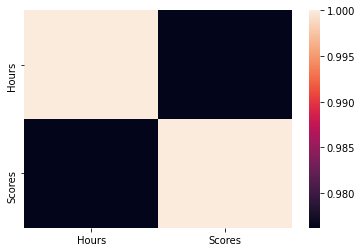

In [8]:
import seaborn as sns
sns.heatmap(corr)

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

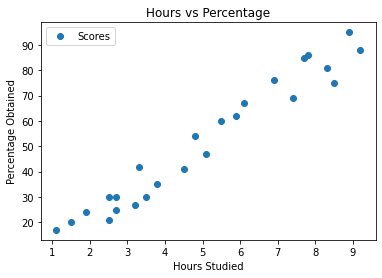

In [9]:
data.plot(x='Hours' , y='Scores' , style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Obtained')
plt.show()

__From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.__

## Step 4 : Data prepration
#### Dividing independent and dependent variables

The next step is to divide the data into __"attributes"__ (inputs) and __"labels"__ (outputs).


In [10]:
x= data.iloc[:,:-1].values
y=data.iloc[:,1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:



### Splitting data into training and test sets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.244,random_state=0)

## Step 5 : Training the algorithm
We have splited our data into training and testing sets, and now is finally the time to train our algorithm.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(x_train,y_train)  #fitting our  model using lr

LinearRegression()

## Step 6 : Visualizing the Model
#### Plotting the Regression

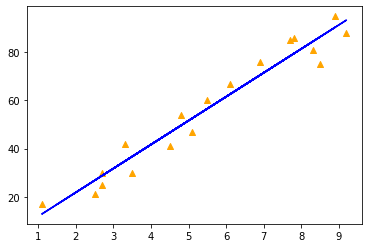

In [16]:
#Plotting the training data

line= lr.coef_*x+lr.intercept_

plt.scatter(x_train,y_train, color='orange', marker = '^')
plt.plot(x, line,color='blue')
plt.show()

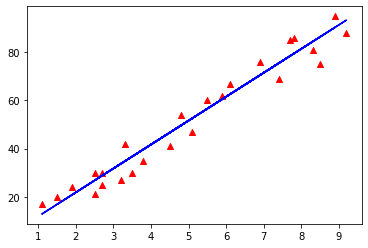

In [17]:
#plotting the test data

line= lr.coef_*x+lr.intercept_

plt.scatter(x,y, color='r', marker = '^')
plt.plot(x, line,color='blue')
plt.show()

## Step 7 : Making Prediction
#### Now that we have trained our algorithm, it's time to make some predictions.



In [18]:

print(x_test) # Testing data - In Hours
y_pred = lr.predict(x_test)

y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

## Step 8 : Comparing Actual vs Predicted


In [19]:
df = pd.DataFrame({'Actual' : y_test , 'Predicted': y_test})

In [20]:
df

,Actual,Predicted
0,20,20
1,27,27
2,69,69
3,30,30
4,62,62
5,35,35
6,24,24


In [21]:
#Testing with our own data

hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.89272889341655


## Step 9 : Evaluation of the model 
#### Evaluation of the model using the most common performance metrics
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics

In [22]:
from sklearn import metrics
#Model statistics
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
test_accuracy = lr.score(x_test,y_test)
train_accuracy = lr.score(x_train,y_train)
print("Training Set Accuracy: {}%".format(train_accuracy*100))
print("Test Set Accuracy: {}%".format(test_accuracy*100,"%"))


Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Training Set Accuracy: 94.84509249326872%
Test Set Accuracy: 93.67661043365055%


## Step 10 : Conclusion:
From the above prediction, we can say that the student will score __93.89__ marks if he studies for __9.25__ hours with an error difference of __4.13__ marks.

In [ ]:
https://youtu.be/wLPMWICrjPQ